# Online Retail Customer Analysis

## Objective
Analyze **customer purchasing behavior** using transactional data to identify key customer segments and trends.

## Dataset Overview
Contains records of online retail transactions, including invoice number, product ID, quantity, price, customer ID, and country.

## Instructions
1. Load and explore the dataset.
2. Clean the data (handle missing values).
3. Conduct RFM Analysis.
4. Visualize customer behavior.
5. Summarize insights.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# Load dataset
df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


## Exploratory Data Analysis (EDA)
- Missing values
- Basic statistics
- Customer distribution

In [6]:
# Handle missing values


# Convert date column

# Add total amount


# Preview cleaned data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
dtype: int64

In [8]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['Customer ID'])

In [9]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [10]:
# Convert InvoiceDate to datetime safely (handles bad values)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Check how many invalid dates became NaT
print(df['InvoiceDate'].isna().sum())

# Drop rows where InvoiceDate could not be converted
df = df.dropna(subset=['InvoiceDate'])


480509


In [11]:
df.shape

(331384, 8)

In [12]:
df.isnull().any().sum()

np.int64(0)

In [14]:
# Create Total Amount column (Total Price per transaction)
df['TotalAmount'] = df['Quantity'] * df['Price']

# Check the result
df[['Quantity', 'Price', 'TotalAmount']].head()


,Quantity,Price,TotalAmount
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
# Basic plot of purchase values


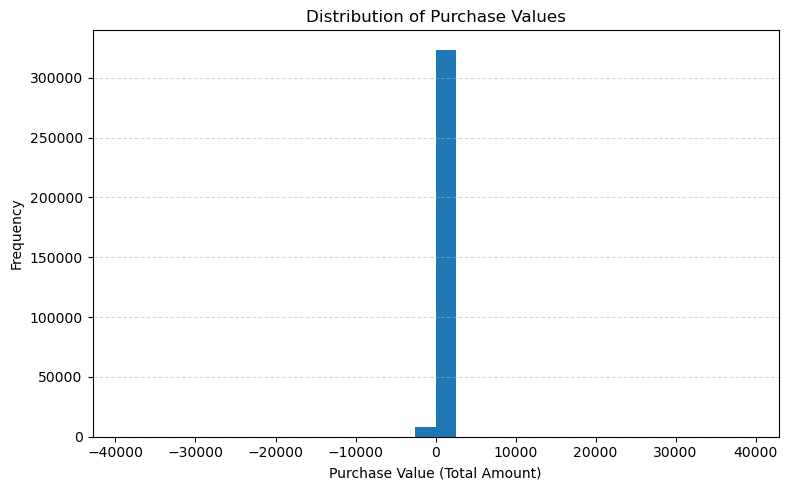

In [16]:
# Histogram of Purchase Values
plt.figure(figsize=(8,5))
plt.hist(df['TotalAmount'], bins=30)
plt.title("Distribution of Purchase Values")
plt.xlabel("Purchase Value (Total Amount)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Insights

* Most purchases are concentrated in the low-value range, showing that the majority of customers make small to medium-sized purchases.

* The distribution is right-skewed, meaning only a few customers make very high-value purchases.

* High-value purchases appear rare but significant, indicating the presence of VIP or bulk-buying customers.

* The spending behavior suggests that revenue is driven by a small group of high spenders, following the Pareto (80/20) principle.

* The histogram helps clearly distinguish between:

1 Regular customers (frequent low-value buyers)

2 Premium customers (infrequent but high-value buyers)

# This insight supports:

* Targeted marketing for high spenders

* Promotional offers for low-spending customers

## Customer Segmentation (RFM Analysis)
- **Recency**: How recent was the customer's last purchase?
- **Frequency**: How often do they buy?
- **Monetary**: How much do they spend?

In [ ]:
# RFM computation


In [18]:
# Set snapshot date (1 day after last transaction)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [20]:
#  Compute RFM values
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                   # Frequency
    'TotalAmount': 'sum'                                     # Monetary
})

In [21]:
#Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [22]:
#  Display RFM table
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,610,5,66.55
12347.0,96,4,3027.26
12348.0,221,1,367.00
12349.0,973,1,-24.15
12350.0,312,1,334.40


## Data Visualization
- Frequency vs. Monetary
- Recency Distribution

In [ ]:
# Scatterplot for RFM

# Recency histogram


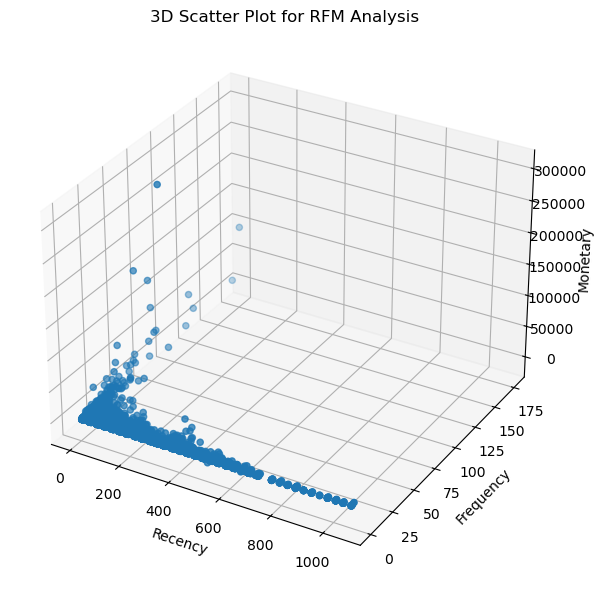

In [23]:
# 3D Scatter Plot for RFM Analysis

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'])

ax.set_title("3D Scatter Plot for RFM Analysis")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

plt.tight_layout()
plt.show()


# 3D Scatter plot shows

* It shows customer behavior in three dimensions:
  Recency (X), Frequency (Y), and Monetary (Z).

* Each dot represents one customer.

* Customers with low recency, high frequency, and high monetary value are your best customers.

* Customers with high recency and low frequency are inactive or at-risk.

* Customers with high monetary value but low frequency are big spenders but infrequent buyers.

* The plot helps visually identify valuable, loyal, and at-risk customer segments.

* It supports targeted marketing and retention strategies.

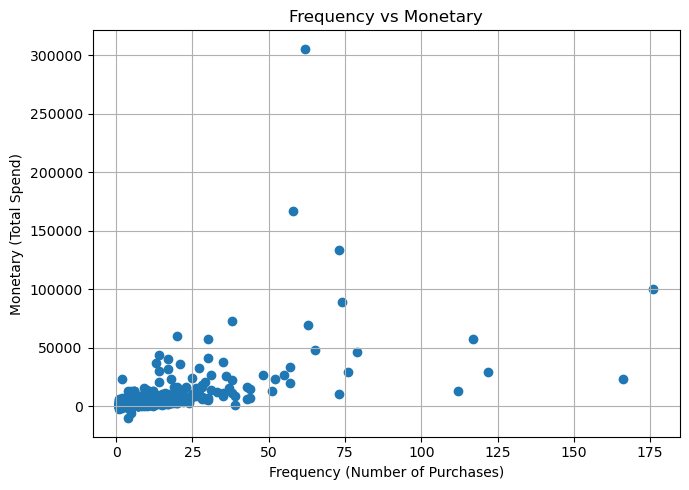

In [24]:
# Scatter plot of Frequency vs Monetary
plt.figure(figsize=(7,5))
plt.scatter(rfm['Frequency'], rfm['Monetary'])
plt.title("Frequency vs Monetary")
plt.xlabel("Frequency (Number of Purchases)")
plt.ylabel("Monetary (Total Spend)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter plot shows

* Higher frequency generally leads to higher spending.

* A few customers show very high spending and high frequency -> valuable customers.

* Most customers fall in the low frequency, low monetary area.

* Some customers spend high amounts but buy infrequently -> bulk or premium buyers.

* Helps identify VIP, regular, and low-value customers.

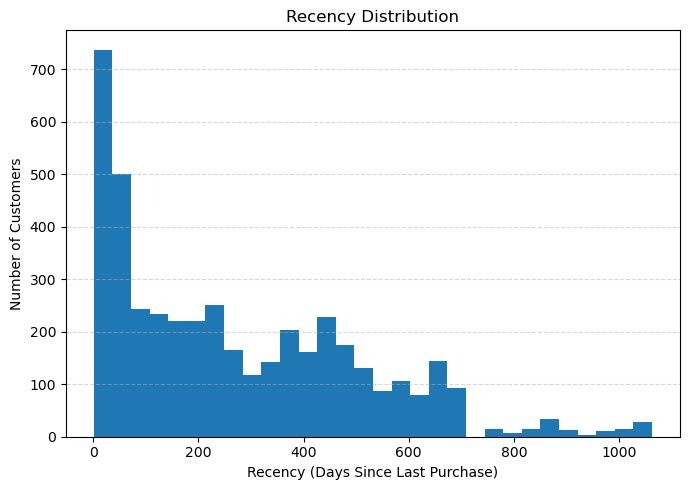

In [25]:
plt.figure(figsize=(7,5))
plt.hist(rfm['Recency'], bins=30)
plt.title("Recency Distribution")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Histogram shows

* Most customers fall in the low recency range, meaning they are recently active.

* Customers with high recency values are inactive or at-risk customers.

* A right-skewed pattern usually indicates that only a few customers have been inactive for a long time.

* Recent customers are more likely to repurchase than inactive ones.

* This insight helps target:

 1 Active customers for upselling

 2 Inactive customers for re-engagement campaigns

## Key Business Insights 

* Most customers make low to medium value purchases, while a small group contributes high revenue.

* High-frequency customers also show high spending, making them the most valuable segment.

* Customers with low recency are actively purchasing and should be prioritized for promotions.

* Customers with high recency and low frequency are at-risk and need re-engagement.

* Some customers buy rarely but spend a lot → ideal for premium offers.

* Sales are driven by a small group of loyal and high-value customers.

## Final Conclusion (Business-Oriented)

* RFM analysis successfully segmented customers based on Recency, Frequency, and Monetary value.

* Best and loyal customers generate the highest revenue and should be retained using loyalty programs.

* At-risk customers need reactivation campaigns to prevent churn.

* The analysis enables targeted marketing, personalized offers, and better revenue optimization.

* This data-driven approach helps businesses increase customer lifetime value and overall profitability.

## Conclusion
- Customers segmented using RFM.
- Insights can guide marketing efforts and retention strategies.